## Backtesting with CAPM

*Objective*: Conduct backtesting on the CAPM strategy   
What is *backtesting*: Applying our strategy on past stock prices to see if it would have been effective   
What is CAPM: Refer to the CAPM file   
To assess the effectiveness of the *CAPM strategy*, we compare the return obtained by applying this strategy to the return that would have been achieved with the *equally-weighted buy-and-hold portfolio* (buying each stock in equal proportion at the beginning of the period and selling at the end of the period). We also compare it with our *market* (which is not equally-weighted).

As a reminder, here is the formula of CAPM: $Ri = rf + ß*(Rm-rf)$




### Rules for the inputs :
**arg** : Define the study period in years (default 5 years) and the Investment horizon interval: Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]    
**list_tickers** : Define the companies you can trade    
**market** : Define the benchmark (default is CAC40)    
**rf** : Define the risk-free rate (default 3%)    
**short_sales_allowed** : Are short sales allowed?     
**transaction_costs** : Rentrer les frais de transaction en pourcentage d'une prise de position (default is 0%)

In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [21]:
##Input
arg = {"period": "5y", "interval": "1wk"}
list_tickers = ["AI.PA", "AIR.PA", "TTE.PA", "DEC.PA", "ALO.PA", "GLE.PA","MT.AS", "CS.PA", "BNP.PA", "EN.PA", "CAP.PA", "CA.PA", "ACA.PA", "BN.PA", "DSY.PA", "ENGI.PA", "EL.PA", "ERF.PA", "RMS.PA", "KER.PA","LR.PA", "OR.PA", "MC.PA", "ML.PA", "ORA.PA", "RI.PA", "PUB.PA", "RNO.PA", "SAF.PA", "SGO.PA", "SAN.PA", "SU.PA", "STLAP.PA", "STMPA.PA", "TEP.PA", "HO.PA", "VIE.PA", "DG.PA", "WLN.PA"]
market = ["^FCHI"]
rf = 0.0
short_sales_allowed = True
transaction_costs = 0

In [32]:
# We retrieve the periodic variations of each stock and put them in a dataframe
df = pd.DataFrame()
for entity in list_tickers + market:
    price_history = yf.Ticker(entity).history(**arg)["Close"].pct_change().dropna().to_frame()
    price_history.rename(columns={"Close": entity}, inplace=True)
    df = pd.concat([df, price_history], axis=1)

df.dropna(inplace=True)
df

,AI.PA,AIR.PA,TTE.PA,DEC.PA,ALO.PA,GLE.PA,MT.AS,CS.PA,BNP.PA,EN.PA,...,SAN.PA,SU.PA,STLAP.PA,STMPA.PA,TEP.PA,HO.PA,VIE.PA,DG.PA,WLN.PA,^FCHI
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-10 23:00:00+00:00,0.026161,0.055237,0.027220,0.029008,0.024247,0.078854,0.022234,0.036843,0.045814,0.026382,...,0.036077,0.046154,0.000000,0.049533,0.009500,0.021287,0.018283,0.022760,-0.003980,0.033281
2019-03-17 23:00:00+00:00,-0.027253,-0.026173,-0.043907,0.014095,-0.003382,-0.064847,-0.039632,-0.020399,-0.060065,-0.029988,...,-0.015588,-0.042138,0.000000,-0.006156,0.016311,-0.042139,-0.004239,-0.016690,0.047952,-0.025049
2019-03-24 23:00:00+00:00,0.024401,0.028796,0.014239,-0.008047,0.008092,0.009794,-0.016877,0.004478,0.023664,0.004732,...,0.005491,0.032477,0.000000,-0.090210,-0.011111,0.009934,-0.001753,0.022159,0.006673,0.015296
2019-03-31 22:00:00+00:00,0.028231,0.006616,0.015549,0.020649,0.032885,0.033947,0.107431,0.036558,0.044473,0.043642,...,-0.003175,0.041464,0.000000,0.181922,0.034332,0.014052,0.026091,0.029751,0.026515,0.023487
2019-04-07 22:00:00+00:00,-0.007722,-0.000674,-0.005966,0.021676,0.020557,0.050657,0.002850,0.003871,0.040669,0.022864,...,-0.039368,0.010983,0.000000,0.031812,0.042245,-0.018014,0.000489,0.004031,0.046125,0.004839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-04 23:00:00+00:00,-0.022300,0.008171,-0.001338,-0.009636,-0.021739,-0.058212,0.034100,-0.017848,-0.046736,-0.025724,...,-0.012219,0.038474,0.057217,0.062578,-0.021555,-0.014375,-0.022652,-0.007350,-0.028037,0.007278
2024-02-11 23:00:00+00:00,0.021615,-0.027770,0.002847,0.045405,-0.000427,0.011259,-0.034106,0.033011,0.017590,0.040971,...,-0.000462,0.030312,0.058575,-0.003278,-0.022752,0.051982,-0.003408,-0.024970,0.005435,0.015778
2024-02-18 23:00:00+00:00,0.107539,0.011070,-0.003840,0.029990,0.008123,0.022268,-0.051307,0.042608,0.036962,-0.001166,...,0.037590,0.039128,0.035136,-0.023963,-0.018847,-0.035905,0.032490,0.031084,-0.034927,0.025553


In [33]:
# Calculating CAPM => predicting the price for the next period
df_CAPM = pd.DataFrame()
for i in range(2, len(df)):
    df_period = df.iloc[:i]
    # Creating the df_period_pour_covariance to shift the market column: this allows us to look at the correlation between market returns at t and stock returns at t+1: and thus to look at the prediction potential
    df_period_pour_covariance = df_period.copy()
    df_period_pour_covariance[market[0]] = df_period[market[0]].shift(1)
    beta = df_period_pour_covariance.cov()[market[0]] / df_period[market[0]].var()
    CAPM = rf + beta * (df_period[market[0]].mean() - rf)
    df_CAPM = pd.concat([df_CAPM, CAPM], axis=1)
df_CAPM = df_CAPM.T[list_tickers]
df_CAPM.index = df.iloc[2:].index
df_CAPM

,AI.PA,AIR.PA,TTE.PA,DEC.PA,ALO.PA,GLE.PA,MT.AS,CS.PA,BNP.PA,EN.PA,...,SGO.PA,SAN.PA,SU.PA,STLAP.PA,STMPA.PA,TEP.PA,HO.PA,VIE.PA,DG.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-24 23:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-31 22:00:00+00:00,-0.013241,-1.409092e-02,-0.014905,0.005676,-0.002941,-0.019134,-0.005833,-0.006377,-0.021464,-0.008900,...,-0.025010,-0.005403,-0.019127,0.000000,0.021547,0.007030,-0.013349,-0.000637,-0.009959,0.010582
2019-04-07 22:00:00+00:00,-0.011515,-1.400723e-02,-0.013163,0.006962,-0.000959,-0.015397,0.003115,-0.003527,-0.017691,-0.005314,...,-0.018998,-0.005382,-0.016403,0.000000,0.037325,0.009283,-0.011591,0.001293,-0.008346,0.010732
2019-04-14 22:00:00+00:00,-0.010168,-1.108003e-02,-0.010229,0.006389,-0.000089,-0.007180,0.001254,-0.002957,-0.010539,-0.002735,...,-0.014561,-0.006967,-0.012589,0.000000,0.028982,0.009493,-0.009885,0.000492,-0.007044,0.009799
2019-04-21 22:00:00+00:00,-0.010745,-1.138930e-02,-0.010531,0.005890,0.000525,-0.008182,-0.000104,-0.003329,-0.012127,-0.003422,...,-0.014610,-0.006116,-0.013756,0.000000,0.028454,0.011263,-0.010623,-0.000406,-0.006465,0.012510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-04 23:00:00+00:00,-0.000026,-6.000125e-07,0.000200,0.000244,0.000237,0.000414,0.000205,0.000156,0.000239,-0.000403,...,0.000082,-0.000063,-0.000160,-0.000187,0.000066,-0.000300,0.000160,0.000132,-0.000234,0.000122
2024-02-11 23:00:00+00:00,-0.000025,-9.349053e-07,0.000203,0.000248,0.000241,0.000423,0.000205,0.000160,0.000245,-0.000405,...,0.000082,-0.000063,-0.000164,-0.000192,0.000063,-0.000301,0.000163,0.000135,-0.000236,0.000125
2024-02-18 23:00:00+00:00,-0.000024,-2.413333e-06,0.000208,0.000257,0.000247,0.000435,0.000209,0.000165,0.000252,-0.000414,...,0.000084,-0.000064,-0.000167,-0.000195,0.000064,-0.000311,0.000170,0.000138,-0.000244,0.000128


In [34]:
# If short sales are allowed, we assign a value of -1 if the CAPM prediction is negative (indicating a predicted decrease in price), otherwise 1.
# If short sales are not allowed, we assign a value of 0 if the CAPM prediction is negative.
if short_sales_allowed:
    df_position = np.where(df_CAPM > 0, 1, -1)
else:
    df_position = np.where(df_CAPM > 0, 1, 0)
    
# We create a dataframe with our expected return based on CAPM to determine the weights to be applied to the stocks
df_return_expected = df_position * df_CAPM
# We calculate the weights for each stock proportionally to the expected return
df_weights = df_return_expected.div(df_return_expected.sum(axis=1), axis=0)
# When calculating the weights, if the sum of the row is equal to 0 it results in NaN because we cannot divide by 0. So we replace all NaN with 0
df_weights = pd.DataFrame(np.where(np.isnan(df_weights), 0, df_weights))
df_weights.index = df_return_expected.index
df_weights.columns = df_return_expected.columns

# We calculate the absolute difference in the weight of the stock in the portfolio at t-1 and t, and sum all these differences to obtain the percentage of our portfolio that has changed. This will allow us to calculate transaction costs at t
df_transaction_costs = abs(df_weights.diff()).sum(axis=1) * transaction_costs

# We shift the df_position because we make the decision to buy or sell at the close and observe the results the next day
df_return = df_weights.shift(1) * df[list_tickers]
df_return.dropna(inplace=True)
df_return

,AI.PA,AIR.PA,TTE.PA,DEC.PA,ALO.PA,GLE.PA,MT.AS,CS.PA,BNP.PA,EN.PA,...,SGO.PA,SAN.PA,SU.PA,STLAP.PA,STMPA.PA,TEP.PA,HO.PA,VIE.PA,DG.PA,WLN.PA
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-31 22:00:00+00:00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
2019-04-07 22:00:00+00:00,-0.000242,-2.251594e-05,-0.000211,0.000292,0.000143,0.002298,0.000039,0.000059,0.002069,0.000482,...,0.001318,-0.000504,0.000498,-0.000000,0.001625,0.000704,-0.000570,7.388956e-07,0.000095,0.001157
2019-04-14 22:00:00+00:00,0.000671,4.925074e-04,0.000208,0.000413,-0.000004,0.001419,0.000389,0.000152,0.002593,0.000397,...,0.001333,-0.000459,0.001903,-0.000000,0.003251,-0.000697,0.000402,9.477689e-05,-0.000071,-0.001179
2019-04-21 22:00:00+00:00,0.000134,1.062151e-03,-0.000670,0.000396,-0.000006,-0.001123,-0.000337,-0.000037,-0.001548,-0.000035,...,-0.000995,0.001099,-0.000372,-0.000000,-0.002350,0.000645,0.001314,1.372029e-05,-0.000011,0.001185
2019-04-28 22:00:00+00:00,-0.000060,-7.082868e-04,-0.000123,-0.000316,-0.000046,0.000973,-0.000010,-0.000269,0.001154,-0.000498,...,-0.000027,0.000376,-0.001092,-0.000000,0.001214,-0.000695,-0.002002,1.387335e-05,0.000239,-0.001285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-04 23:00:00+00:00,-0.000083,2.742279e-07,-0.000040,-0.000356,-0.000746,-0.003680,0.001034,-0.000430,-0.001886,-0.001501,...,0.000269,-0.000088,0.000961,0.001789,0.000704,-0.000920,-0.000343,-4.414499e-04,-0.000253,-0.000576
2024-02-11 23:00:00+00:00,0.000084,-2.487269e-06,0.000085,0.001657,-0.000015,0.000697,-0.001044,0.000771,0.000629,0.002462,...,0.000244,-0.000004,0.000723,0.001635,-0.000032,-0.001017,0.001245,-6.720609e-05,-0.000873,0.000099
2024-02-18 23:00:00+00:00,0.000391,1.524836e-06,-0.000115,0.001095,0.000288,0.001387,-0.001552,0.001002,0.001335,-0.000070,...,0.000184,0.000347,0.000944,0.000994,-0.000223,-0.000837,-0.000864,6.470780e-04,0.001081,-0.000642


In [35]:
# We multiply the return of each stock by its weight in the portfolio, sum these results for each time t, and finally compute the cumulative sum to get the portfolio return evolution over time
return_portfolio = pd.DataFrame()
# We add our periodic return of each stock subtracting transaction costs for the period
df_return_transaction_costs_included = df_return.sum(axis=1) - df_transaction_costs[1:]
return_portfolio["CAPM"] = df_return_transaction_costs_included.cumsum()
# We compare our performance to the performance of the equally-weighted portfolio
return_portfolio["Buy-and-Hold"] = (df[list_tickers][3:] * 1/len(list_tickers)).sum(axis=1).cumsum()
return_portfolio[market[0]] = df[market[0]][3:].cumsum()

print("Here are the returns of the different portfolios:\n", return_portfolio.iloc[-1])

Here are the returns of the different portfolios:
 CAPM            0.680531
Buy-and-Hold    0.733017
^FCHI           0.521699
Name: 2024-03-03 23:00:00+00:00, dtype: float64


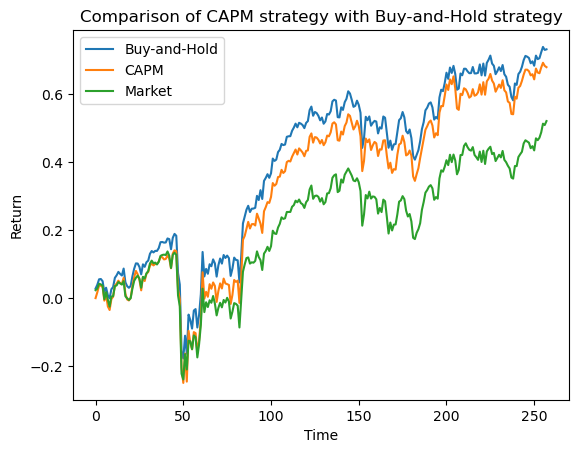

In [36]:
# Graphical display of performance
hold = return_portfolio["Buy-and-Hold"]
strategy = return_portfolio["CAPM"]
market_graph = return_portfolio[market[0]]
plt.plot(range(len(hold)), hold, label="Buy-and-Hold")
plt.plot(range(len(strategy)), strategy, label="CAPM")
plt.plot(range(len(market_graph)), market_graph, label="Market")
plt.xlabel('Time')
plt.ylabel('Return')
plt.title('Comparison of CAPM strategy with Buy-and-Hold strategy')
plt.legend()